In [21]:
from collections import Counter
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from utils import clean_text


In [2]:
with open('configs.json', 'r') as f:
    configs = json.load(f)

path = configs['DATA_DIRECTORY']
company_file_path = configs['COMPANY_FILE']

# get paths to subfolders
file_names = [x for x in os.listdir(path) if x.endswith(".json")]

In [3]:
print(file_names)

['nvdcve-1.1-2002.json', 'nvdcve-1.1-2003.json', 'nvdcve-1.1-2004.json', 'nvdcve-1.1-2005.json', 'nvdcve-1.1-2006.json', 'nvdcve-1.1-2007.json', 'nvdcve-1.1-2008.json', 'nvdcve-1.1-2009.json', 'nvdcve-1.1-2010.json', 'nvdcve-1.1-2011.json', 'nvdcve-1.1-2012.json', 'nvdcve-1.1-2013.json', 'nvdcve-1.1-2014.json', 'nvdcve-1.1-2015.json', 'nvdcve-1.1-2016.json', 'nvdcve-1.1-2017.json', 'nvdcve-1.1-2018.json', 'nvdcve-1.1-2019.json', 'nvdcve-1.1-2020.json']


### Read vulnerabilities from NATIONAL VULNERABILITY DATABASE(NVD) files (https://nvd.nist.gov/vuln/data-feeds#JSON_FEED)

In [4]:
nvd = []

for f_name in file_names:
    with open(path + '/' + f_name, 'r', encoding='utf-8') as f:
        nvd_entry = json.load(f)
    
    for cve_item in nvd_entry['CVE_Items']:
        cve = dict()
        companies = []
        cve['id'] = cve_item['cve']['CVE_data_meta']['ID']
        cve['year'] = cve['id'].split('-')[1]
        cve['assigner'] = cve_item['cve']['CVE_data_meta']['ASSIGNER']        
        
        # only the first type of problem is taken to simplify
        for problem in cve_item['cve']['problemtype']['problemtype_data'][0]['description']:
            cve['problem_type'] = problem['value']
            break
        
        # only the first type of problem is taken to simplify
        for desc in cve_item['cve']['description']['description_data']:
            if desc['lang'] == 'en':
                cve['description'] = desc['value']
                break
            
        if 'baseMetricV3' in cve_item['impact']:            
            cve['exploitability_mv3'] = cve_item['impact']['baseMetricV3']['exploitabilityScore'] \
                if 'exploitabilityScore' in cve_item['impact']['baseMetricV3'] else None 
            cve['impact_mv3'] = cve_item['impact']['baseMetricV3']['impactScore'] \
                if 'impactScore' in cve_item['impact']['baseMetricV3'] else None 
            if 'cvssV3' in cve_item['impact']['baseMetricV3']:
                cve['cvss3_version'] = cve_item['impact']['baseMetricV3']['cvssV3']['version'] \
                    if 'version' in cve_item['impact']['baseMetricV3']['cvssV3'] else None
                cve['cvss3_attackVector'] = cve_item['impact']['baseMetricV3']['cvssV3']['attackVector'] \
                    if 'attackVector' in cve_item['impact']['baseMetricV3']['cvssV3'] else None
                cve['cvss3_attackComplexity'] = cve_item['impact']['baseMetricV3']['cvssV3']['attackComplexity'] \
                    if 'attackComplexity' in cve_item['impact']['baseMetricV3']['cvssV3'] else None
                cve['cvss3_privilegesRequired'] = cve_item['impact']['baseMetricV3']['cvssV3']['privilegesRequired'] \
                    if 'privilegesRequired' in cve_item['impact']['baseMetricV3']['cvssV3'] else None
                cve['cvss3_userInteraction'] = cve_item['impact']['baseMetricV3']['cvssV3']['userInteraction'] \
                    if 'userInteraction' in cve_item['impact']['baseMetricV3']['cvssV3'] else None
                cve['cvss3_scope'] = cve_item['impact']['baseMetricV3']['cvssV3']['scope'] \
                    if 'scope' in cve_item['impact']['baseMetricV3']['cvssV3'] else None
                cve['cvss3_confidentialityImpact'] = cve_item['impact']['baseMetricV3']['cvssV3']['confidentialityImpact'] \
                    if 'confidentialityImpact' in cve_item['impact']['baseMetricV3']['cvssV3'] else None
                cve['cvss3_integrityImpact'] = cve_item['impact']['baseMetricV3']['cvssV3']['integrityImpact'] \
                    if 'integrityImpact' in cve_item['impact']['baseMetricV3']['cvssV3'] else None
                cve['cvss3_availabilityImpact'] = cve_item['impact']['baseMetricV3']['cvssV3']['availabilityImpact'] \
                    if 'availabilityImpact' in cve_item['impact']['baseMetricV3']['cvssV3'] else None
                cve['cvss3_baseScore'] = cve_item['impact']['baseMetricV3']['cvssV3']['baseScore'] \
                    if 'baseScore' in cve_item['impact']['baseMetricV3']['cvssV3'] else None
                cve['cvss3_baseSeverity'] = cve_item['impact']['baseMetricV3']['cvssV3']['baseSeverity'] \
                    if 'baseSeverity' in cve_item['impact']['baseMetricV3']['cvssV3'] else None
                
        if 'baseMetricV2' in cve_item['impact']:
            cve['severity_mv2'] = cve_item['impact']['baseMetricV2']['severity'] \
                if 'severity' in cve_item['impact']['baseMetricV2'] else None 
            cve['acInsufInfo_mv2'] = cve_item['impact']['baseMetricV2']['acInsufInfo'] \
                if 'acInsufInfo' in cve_item['impact']['baseMetricV2'] else None 
            cve['obtainAllPrivilege_mv2'] = cve_item['impact']['baseMetricV2']['obtainAllPrivilege'] \
                if 'obtainAllPrivilege' in cve_item['impact']['baseMetricV2'] else None 
            cve['obtainUserPrivilege_mv2'] = cve_item['impact']['baseMetricV2']['obtainUserPrivilege'] \
                if 'obtainUserPrivilege' in cve_item['impact']['baseMetricV2'] else None 
            cve['obtainOtherPrivilege_mv2'] = cve_item['impact']['baseMetricV2']['obtainOtherPrivilege'] \
                if 'obtainOtherPrivilege' in cve_item['impact']['baseMetricV2'] else None 
            cve['userInteractionRequired_mv2'] = cve_item['impact']['baseMetricV2']['userInteractionRequired'] \
                if 'userInteractionRequired' in cve_item['impact']['baseMetricV2'] else None        
            cve['exploitability_mv2'] = cve_item['impact']['baseMetricV2']['exploitabilityScore'] \
                if 'exploitabilityScore' in cve_item['impact']['baseMetricV2'] else None 
            cve['impact_mv2'] = cve_item['impact']['baseMetricV2']['impactScore'] \
                if 'impactScore' in cve_item['impact']['baseMetricV2'] else None 
            
            if 'cvssV2' in cve_item['impact']['baseMetricV2']:
                # version
                cve['cvss2_version'] = cve_item['impact']['baseMetricV2']['cvssV2']['version'] \
                    if 'version' in cve_item['impact']['baseMetricV2']['cvssV2'] else None
                # vectorString
                cve['cvss2_vectorString'] = cve_item['impact']['baseMetricV2']['cvssV2']['vectorString'] \
                    if 'vectorString' in cve_item['impact']['baseMetricV2']['cvssV2'] else None
                # accessVector
                cve['cvss2_accessVector'] = cve_item['impact']['baseMetricV2']['cvssV2']['accessVector'] \
                    if 'accessVector' in cve_item['impact']['baseMetricV2']['cvssV2'] else None
                # accessComplexity
                cve['cvss2_accessComplexity'] = cve_item['impact']['baseMetricV2']['cvssV2']['accessComplexity'] \
                    if 'accessComplexity' in cve_item['impact']['baseMetricV2']['cvssV2'] else None
                # authentication
                cve['cvss2_authentication'] = cve_item['impact']['baseMetricV2']['cvssV2']['authentication'] \
                    if 'authentication' in cve_item['impact']['baseMetricV2']['cvssV2'] else None
                # confidentialityImpact
                cve['cvss2_confidentialityImpact'] = cve_item['impact']['baseMetricV2']['cvssV2']['confidentialityImpact'] \
                    if 'confidentialityImpact' in cve_item['impact']['baseMetricV2']['cvssV2'] else None
                # integrityImpact
                cve['cvss2_integrityImpact'] = cve_item['impact']['baseMetricV2']['cvssV2']['integrityImpact'] \
                    if 'integrityImpact' in cve_item['impact']['baseMetricV2']['cvssV2'] else None
                # availabilityImpact
                cve['cvss2_availabilityImpact'] = cve_item['impact']['baseMetricV2']['cvssV2']['availabilityImpact'] \
                    if 'availabilityImpact' in cve_item['impact']['baseMetricV2']['cvssV2'] else None
                # baseScore
                cve['cvss2_baseScore'] = cve_item['impact']['baseMetricV2']['cvssV2']['baseScore'] \
                    if 'baseScore' in cve_item['impact']['baseMetricV2']['cvssV2'] else None         
            
        cve['published_date'] = cve_item['publishedDate']
        cve['last_modified_date'] = cve_item['lastModifiedDate']
            
        # collect companies
        for config in cve_item['configurations']['nodes']:
            if 'cpe_match' in config:
                for cpe_match in config['cpe_match']:               
                    companies.append(cpe_match['cpe23Uri'].split(':')[3])
            elif 'children' in config:
                for children in config['children']:
                    for cpe_match in children['cpe_match']:
                        companies.append(cpe_match['cpe23Uri'].split(':')[3])
                        
        companies = list(set(companies))
        
        # repeat cve rows -> one company - one cve                    
        for c in companies:
            temp_cve = cve.copy()
            temp_cve['company'] = c
            nvd.append(temp_cve)


In [5]:
nvd = pd.DataFrame(nvd)

### Read and process the list of English companies

In [6]:
eng_companies = pd.read_excel(company_file_path, index_col=0)
eng_companies.rename(columns={"Company name": "company"}, inplace=True)

nvd['company'] = nvd['company'].astype(str)
eng_companies['company'] = eng_companies['company'].astype(str)

nvd['company'] = nvd['company'].apply(lambda x: x.lower())
eng_companies['company'] = eng_companies['company'].apply(lambda x: x.lower())

len(eng_companies['company']), len(eng_companies['company'].unique())

(793038, 791522)

In [7]:
eng_companies.drop_duplicates(['company'], keep='first', inplace=True)

### Merge vulnerabilities with English companies

In [8]:
df = nvd.merge(eng_companies, how='inner', on=['company'], validate="many_to_one")

In [9]:
df.head()

,id,year,assigner,problem_type,description,severity_mv2,acInsufInfo_mv2,obtainAllPrivilege_mv2,obtainUserPrivilege_mv2,obtainOtherPrivilege_mv2,...,cvss3_attackComplexity,cvss3_privilegesRequired,cvss3_userInteraction,cvss3_scope,cvss3_confidentialityImpact,cvss3_integrityImpact,cvss3_availabilityImpact,cvss3_baseScore,cvss3_baseSeverity,Website
0,CVE-1999-0003,1999,cve@mitre.org,NVD-CWE-Other,Execute commands as root via buffer overflow i...,HIGH,None,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.sussexu3anetwork.org.uk/
1,CVE-1999-0008,1999,cve@mitre.org,NVD-CWE-Other,"Buffer overflow in NIS+, in Sun's rpc.nisd pro...",HIGH,None,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.sussexu3anetwork.org.uk/
2,CVE-1999-0009,1999,cve@mitre.org,NVD-CWE-Other,Inverse query buffer overflow in BIND 4.9 and ...,HIGH,None,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.sussexu3anetwork.org.uk/
3,CVE-1999-0010,1999,cve@mitre.org,NVD-CWE-Other,Denial of Service vulnerability in BIND 8 Rele...,MEDIUM,None,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.sussexu3anetwork.org.uk/
4,CVE-1999-0011,1999,cve@mitre.org,NVD-CWE-Other,Denial of Service vulnerabilities in BIND 4.9 ...,HIGH,None,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.sussexu3anetwork.org.uk/


In [10]:
df['company'].unique()

array(['sun', 'ncsa', 'apple', 'pam', 'bmc', 'lotus', 'platinum',
       'progress', 'fore', 'nfr', 'allegro', 'orinoco', 'entrust', 'sane',
       'emc', 'volition', 'starfish', 'kismet', 'light', 'sharp', 'app',
       'epic', 'ada', 'sms', 'arc', 'cat', 'spectrum', 'pegasus', 'link',
       'spine', 'scart', 'beacon', 'lms', 'bbs', 'viewpoint', 'aurora',
       'boost', 'reality', 'pbcs', 'vim', 'fog', 'lazarus', 'dash', 'yap',
       'status', 'rhythm', 'ming', 'quest', 'eduserv', 'gatehouse',
       'intercom', 'nice', 'whisper', 'mol', 'voices', 'nba',
       'parentlink', 'serve', 'ocf', 'parity', 'sma', 'fmt', 'gig',
       'momentum', 'ests', 'swift', 'ilm', 'cdc', 'seesaw', 'ready',
       'sudo', 'abacus', 'cbc', 'solace', 'pcs', 'hive'], dtype=object)

In [11]:
df['company'].describe()

count     10446
unique       76
top       apple
freq       7817
Name: company, dtype: object

# Visualization

In [12]:
vulnerabilities = df.groupby('id')['year', 'severity_mv2'].apply(lambda x: x.iloc[0]).reset_index()

C:\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [13]:
vulnerabilities.head()

,id,year,severity_mv2
0,CVE-1999-0003,1999,HIGH
1,CVE-1999-0008,1999,HIGH
2,CVE-1999-0009,1999,HIGH
3,CVE-1999-0010,1999,MEDIUM
4,CVE-1999-0011,1999,HIGH


### This visualization is a simple graph which shows the distribution of vulnerabilities by severity over time. The choice of LOW, MEDIUM and HIGH is based upon the CVSS V2 Base score.

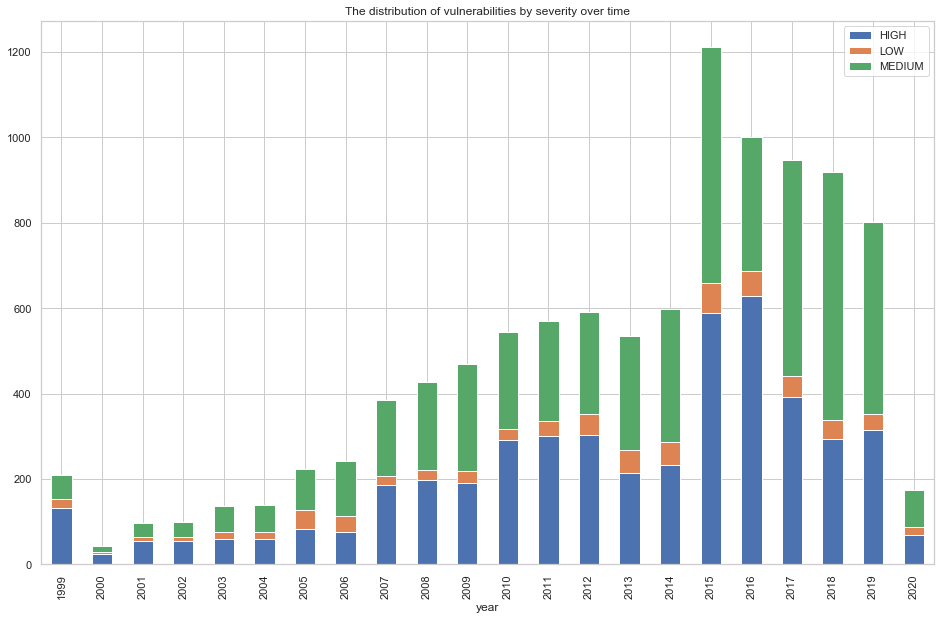

In [14]:
vulnerabilities.groupby(
    ['year', 'severity_mv2']
).size().to_frame().unstack().plot(kind='bar', stacked=True, legend=False, figsize=(16, 10))

plt.title('The distribution of vulnerabilities by severity over time')

plt.xlabel('year')

# fix the legend
current_handles, legend_labels = plt.gca().get_legend_handles_labels()

labels = [l.split(',')[-1].split(')')[0].strip() for l in legend_labels]

plt.legend(current_handles, labels)

plt.show()

### The visualization below shows how the assignment of vulnerability types has changed over time.

C:\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


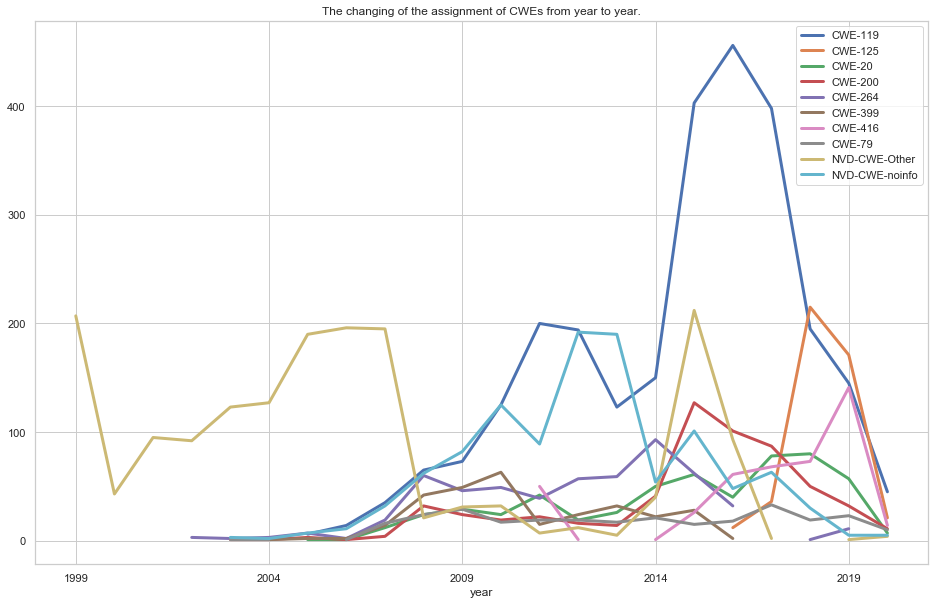

In [15]:
problem_types = df.groupby('id')['year', 'problem_type'].apply(lambda x: x.iloc[0]).reset_index()

n = 10
problem_type_counts = problem_types['problem_type'].value_counts()[:n].index.tolist()

problem_types = problem_types.loc[problem_types['problem_type'].isin(problem_type_counts)]

problem_types.groupby(
    ['year', 'problem_type']
).size().to_frame().unstack().plot(kind='line', subplots=False, legend=True, figsize=(16, 10), linewidth=3)

plt.title('The changing of the assignment of CWEs from year to year.')

current_handles, legend_labels = plt.gca().get_legend_handles_labels()
labels = [l.split(',')[-1].split(')')[0].strip() for l in legend_labels]

plt.legend(current_handles, labels)

plt.show()

In [16]:
descriptions = df.groupby('id')['description', 'cvss2_baseScore'].apply(lambda x: x.iloc[0]).reset_index()

C:\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [17]:
descriptions.head()

,id,description,cvss2_baseScore
0,CVE-1999-0003,Execute commands as root via buffer overflow i...,10.0
1,CVE-1999-0008,"Buffer overflow in NIS+, in Sun's rpc.nisd pro...",10.0
2,CVE-1999-0009,Inverse query buffer overflow in BIND 4.9 and ...,10.0
3,CVE-1999-0010,Denial of Service vulnerability in BIND 8 Rele...,5.0
4,CVE-1999-0011,Denial of Service vulnerabilities in BIND 4.9 ...,10.0


In [20]:
def create_corpus(data):
    _corpus = list()
    
    for x in data.str.split():
        for i in x:
            _corpus.append(i)
    return _corpus


clear_text = descriptions['description'].apply(clean_text)

corpus = create_corpus(clear_text)


### The visualization below was generated by calculating the frequency of words that were part of the vulnerability summary description.

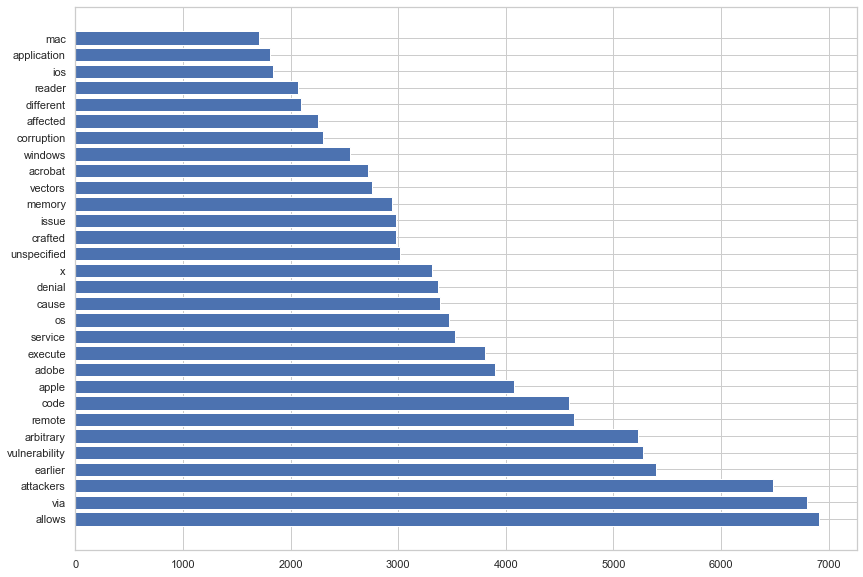

In [38]:
plt.figure(figsize=(14, 10))
counter = Counter(corpus)
most = counter.most_common()
x = list()
y = list()

for word, count in most[:30]:
    x.append(word)
    y.append(count)

plt.barh(x, y)
plt.show()

In [190]:
descriptions.rename(columns={'cvss2_baseScore': 'score'}, inplace=True)

In [192]:
descriptions.to_csv('dataset.csv', index=False)